In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPPORTING dataframe
df = pd.read_csv("E:/Data Science/Projects and assignments/datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option("display.max_columns", None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## EDA

In [3]:
df.shape

(1470, 35)

Data has 1470 rows and 35 columns

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value in the data

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

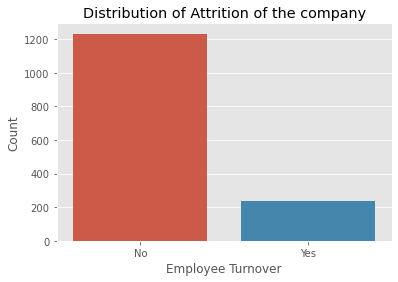

In [7]:
plt.style.use('ggplot')
plt.figure(figsize = (6,4))

labels = df.Attrition.value_counts().index

values = df.Attrition.value_counts().values

sns.barplot(labels, values)

plt.title("Distribution of Attrition of the company")
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.show()

The Attrition column is imbalanced

In [8]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

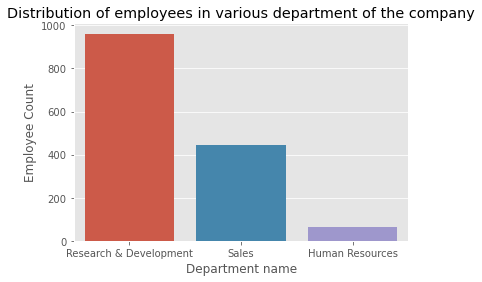

In [9]:
plt.style.use('ggplot')
plt.figure(figsize = (6,4))

labels = df.Department.value_counts().index

values = df.Department.value_counts().values

sns.barplot(labels, values)

plt.title("Distribution of employees in various department of the company")
plt.xlabel("Department name")
plt.ylabel("Employee Count")
plt.show()

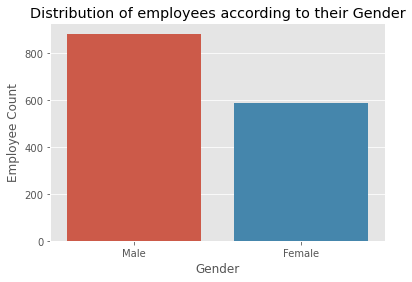

In [10]:
plt.style.use('ggplot')
plt.figure(figsize = (6,4))

labels = df.Gender.value_counts().index

values = df.Gender.value_counts().values

sns.barplot(labels, values)

plt.title("Distribution of employees according to their Gender")
plt.xlabel("Gender")
plt.ylabel("Employee Count")
plt.show()

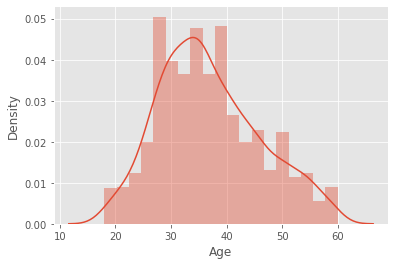

In [11]:
sns.distplot(df.Age)

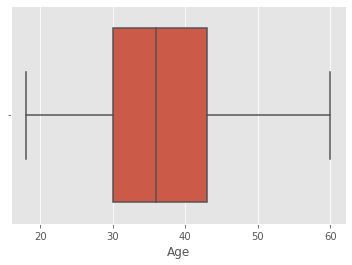

In [12]:
sns.boxplot(df.Age)

Age column is almost normally distributed. 

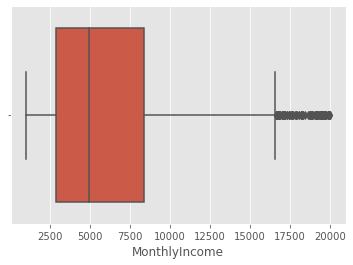

In [13]:
sns.boxplot(df.MonthlyIncome)

Monthly income of the employees rightly skewed . Most of the employees have salary arounf 5000. 

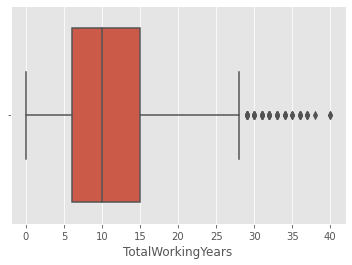

In [14]:
sns.boxplot(df['TotalWorkingYears'])

Total working years of most employees is 10 years. The column is rightly skewed. 

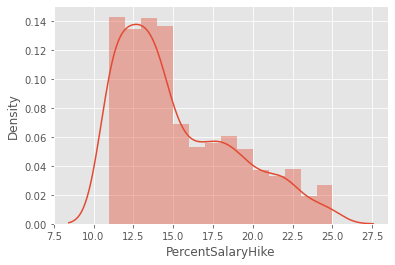

In [15]:
sns.distplot(df.PercentSalaryHike)

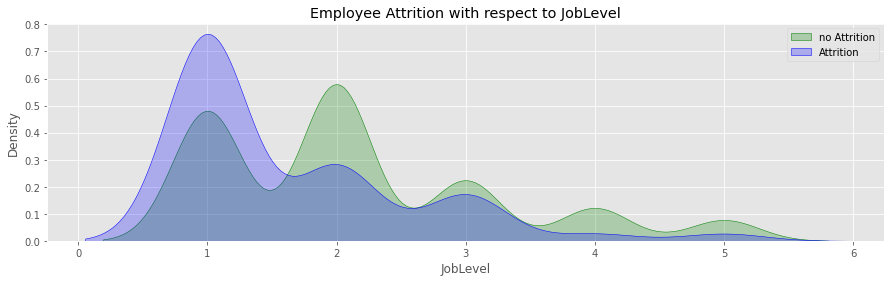

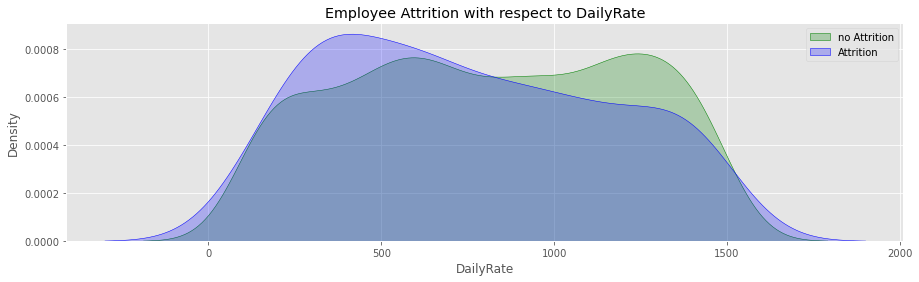

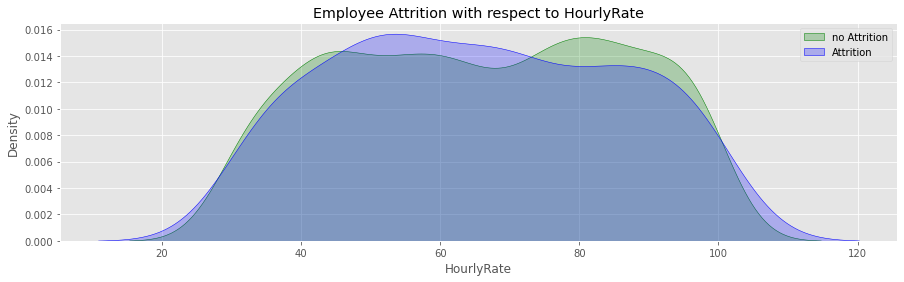

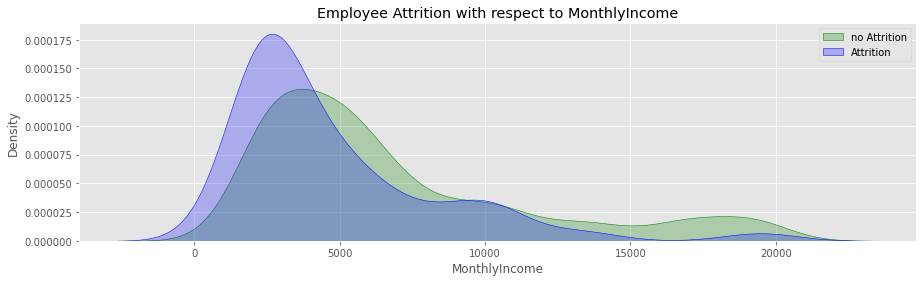

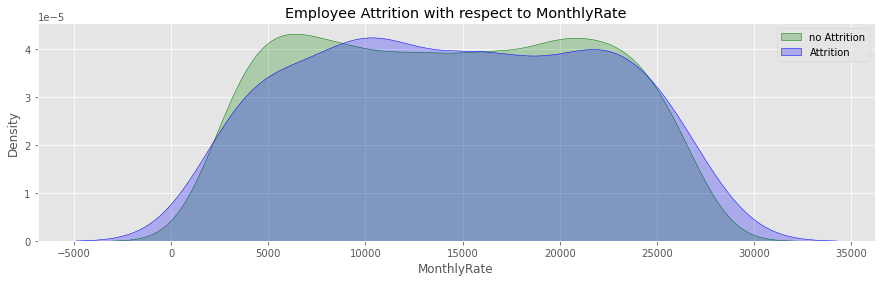

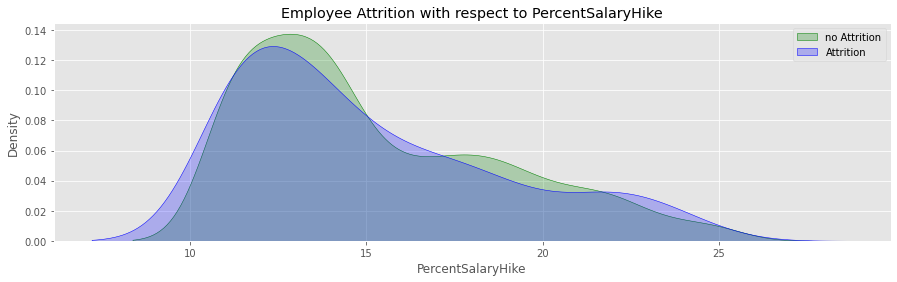

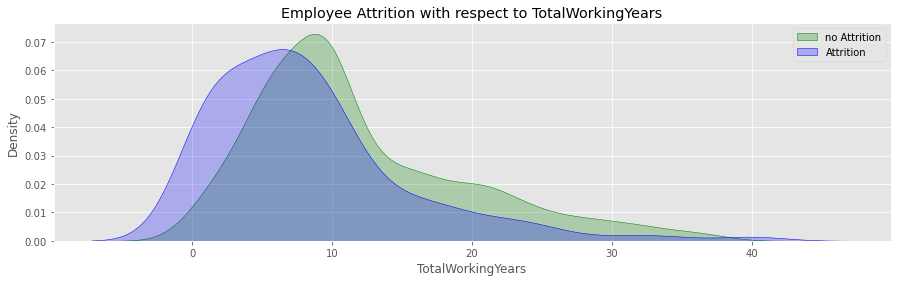

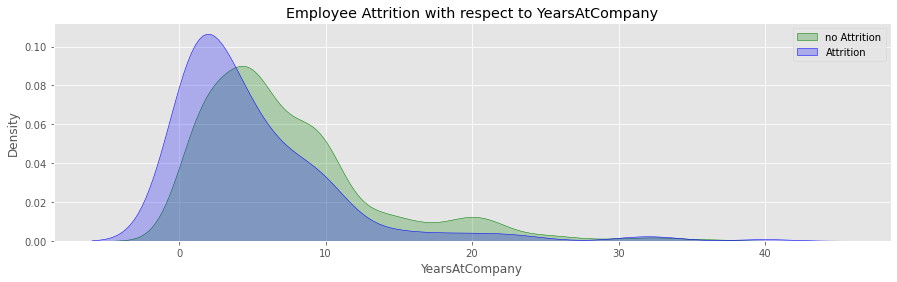

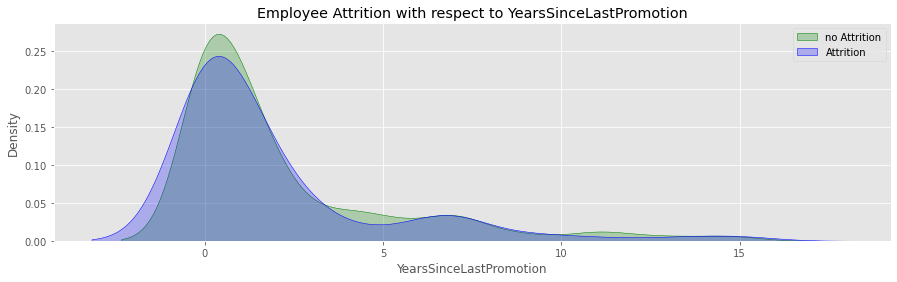

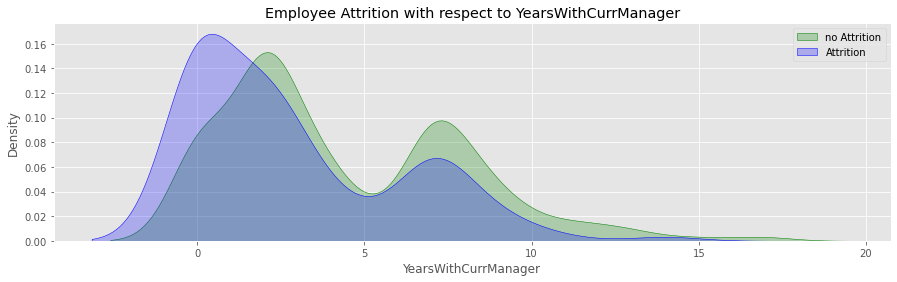

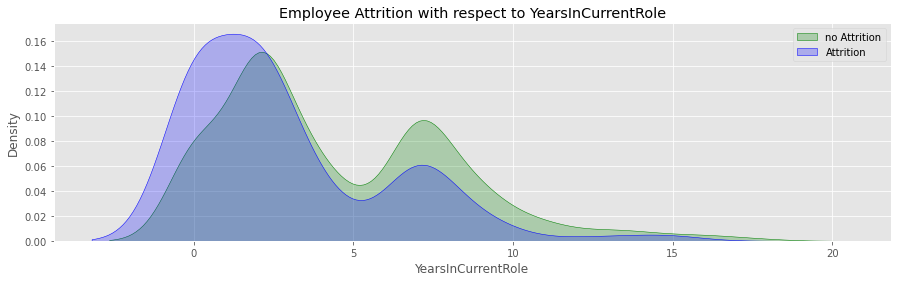

In [16]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),var] , color='g',shade=True, label='no Attrition') 
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),var] , color='b',shade=True, label='Attrition')
    plt.legend()
    plt.title('Employee Attrition with respect to {}'.format(var))

columns = ['JobLevel', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
          'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsInCurrentRole']
for n in columns:
    kdePlot(n)

Attrition is high for Joblevel 1.

Attrition is high for monthly income around 4500.

Attrition is high for PercentSalaryHike close to 12.

Attrition is high for TotalWorkingYears around 6.

Attrition is high for YearsAtCompany near 2-3. 

Attrition is high for Years Since Last Promotion is 0-1.

Attrition is high for Years with Current Manager is 0-1.

Attrition is high for Years in current role 0-1.

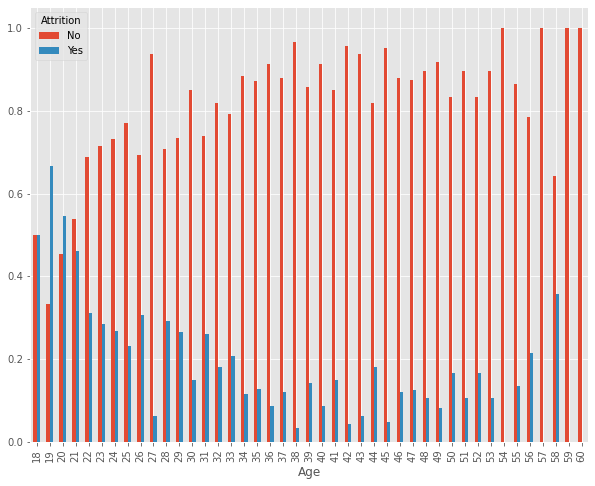

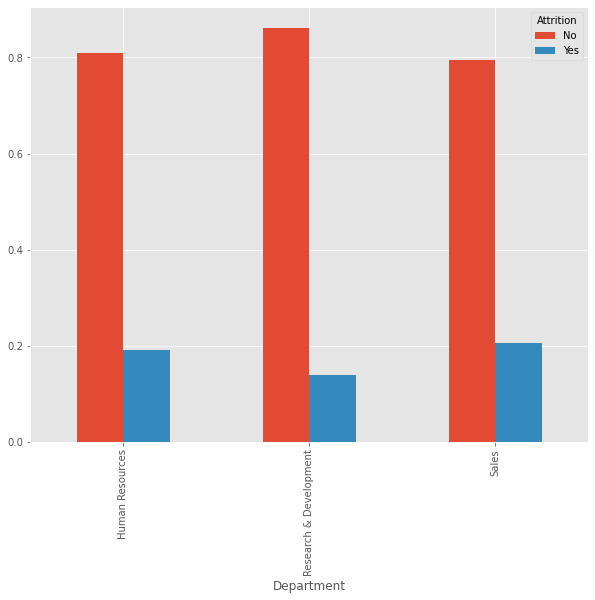

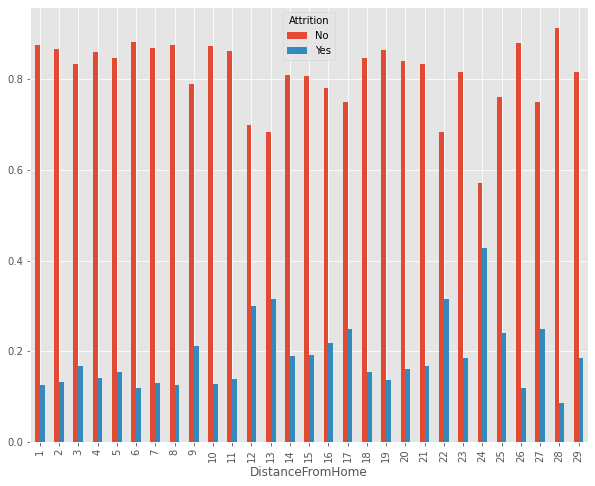

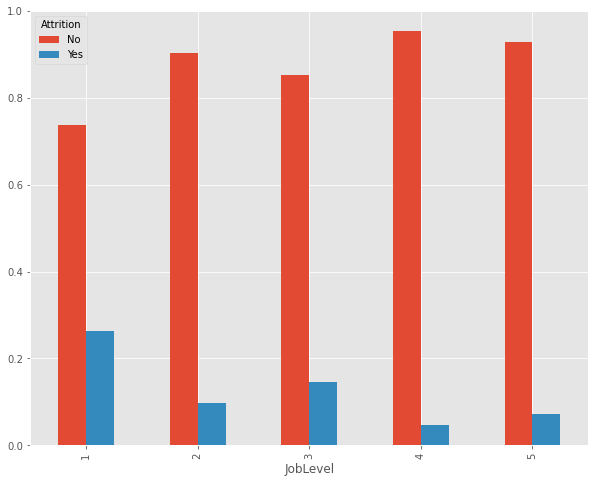

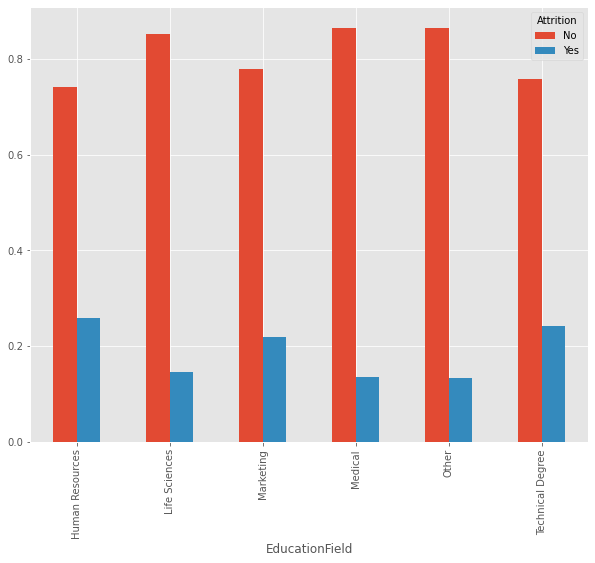

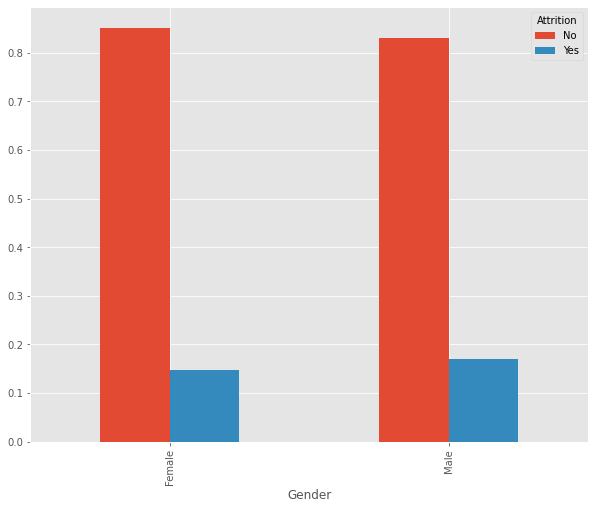

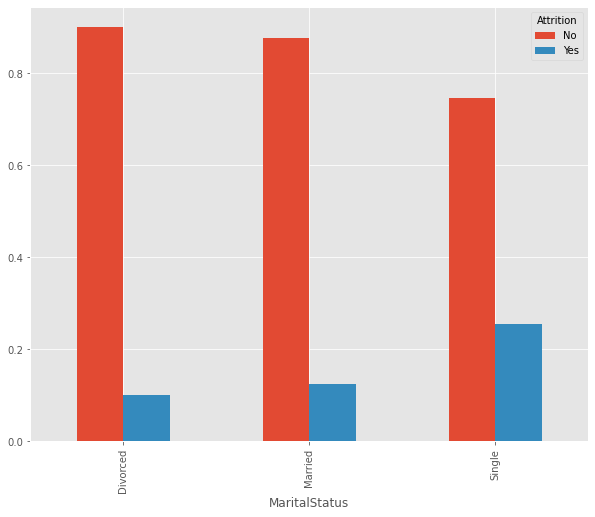

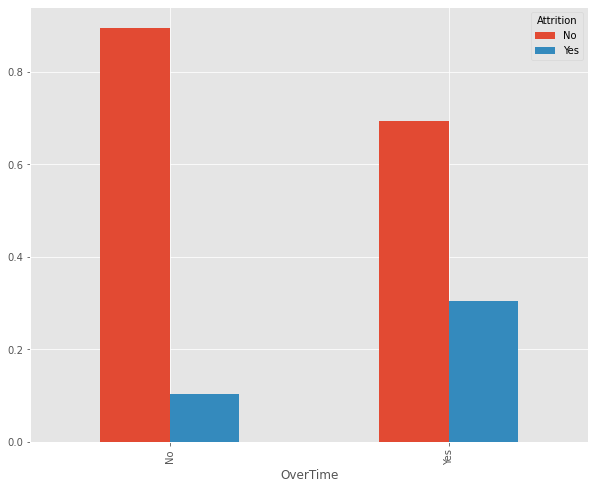

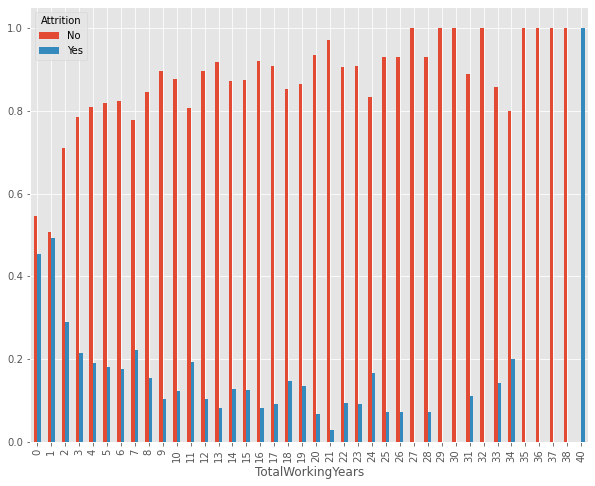

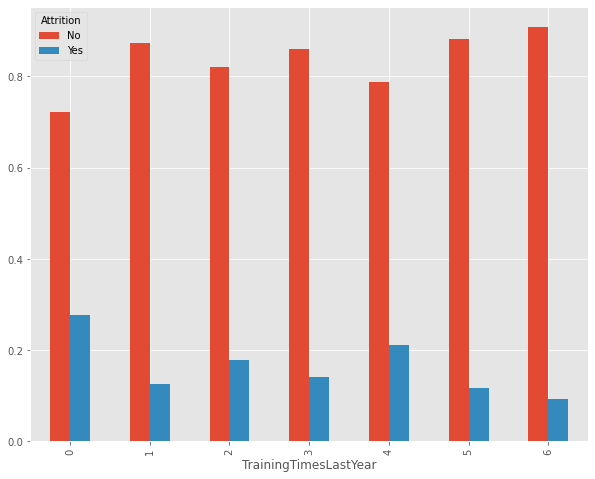

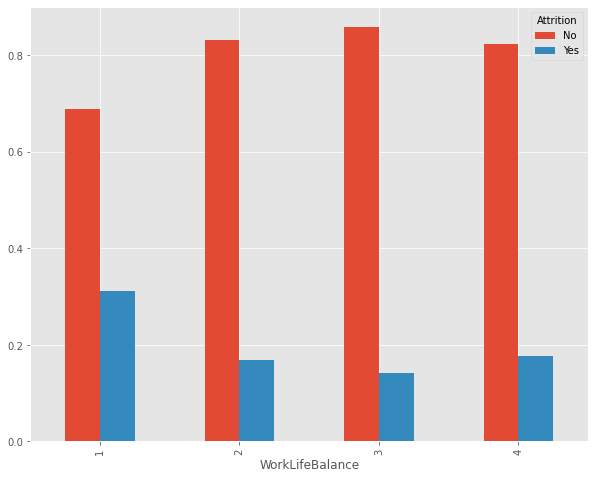

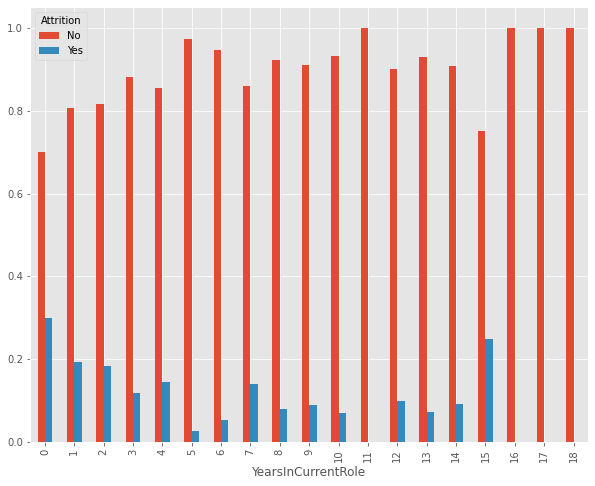

In [17]:
columns = ['Age','Department', 'DistanceFromHome','JobLevel', 'EducationField', 'Gender', 'MaritalStatus', 
            'OverTime','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole' ]

for val in columns:
    matrix = pd.crosstab(df[val], df.Attrition)
    matrix.div(matrix.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,8))
    plt.xticks(rotation=90)

Attrition is high for age 19-21 years. This may be due to they are students or went for higher studies. 
Again Attrition is high for age 58 years. This may be due to retirement and age related health conditions.

The average attrition is high as distance from home increases.

Attrition is high for Job level 1. 

Attrition is high for Human Resources, Marketing and Technical Degree employees. 

Attrition is slightly higher in males than females. 

Attrition is high for unmarried/single employees. 

Attrition is high for employees doing overtime. 

Attrition is high for employees with working years 0-1. Again Attrition is high for employees above 40. 

Attrition is slightly higher for employees having 0 training time last year. 

In [18]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [19]:
df = df.drop(['EmployeeCount','StandardHours','EmployeeNumber'], axis = 1)

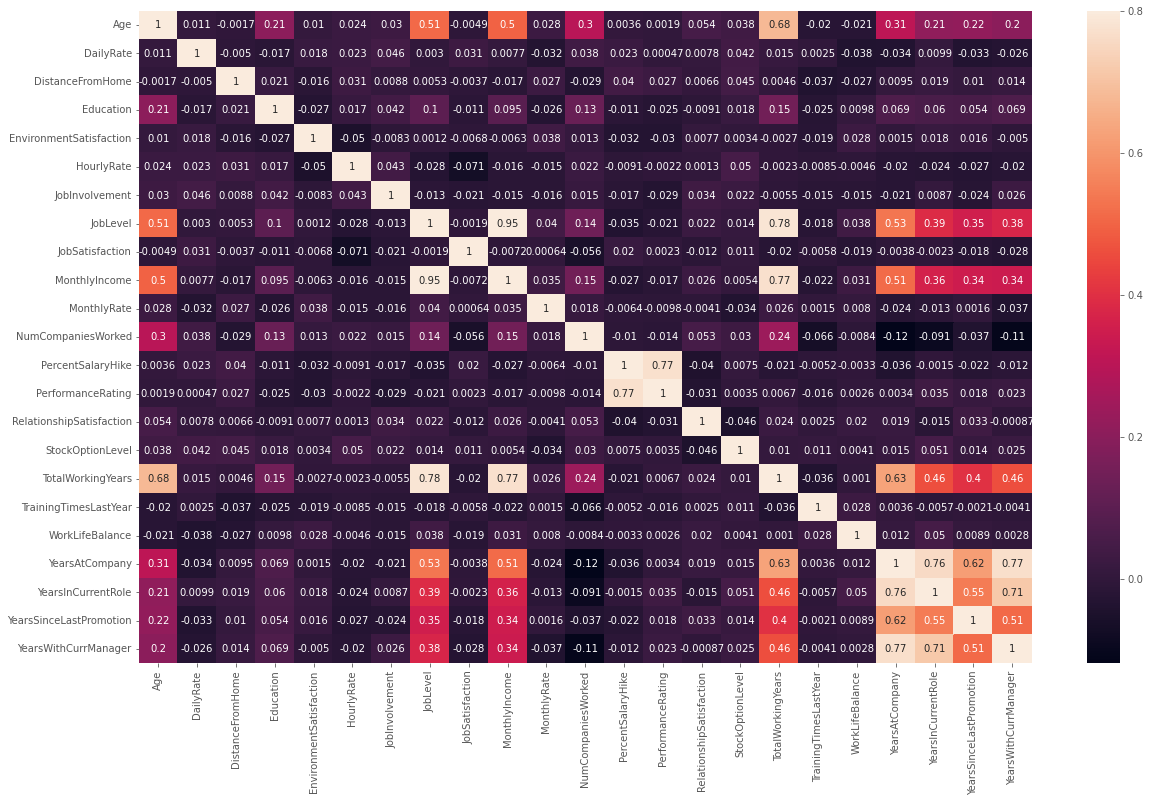

In [20]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [21]:
#LABEL ENCODING
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

#selecting categorical columns to encode from dataset

cat_columns = list(df.select_dtypes("object").columns)

#setting up the imputer 

transformer = ColumnTransformer(transformers = [("L", OrdinalEncoder(),cat_columns)], remainder = 'passthrough')
cat_columns_imputed = transformer.fit_transform(df[cat_columns])

#passing the imputer values in each of the categorical columns in the original dataset

df[cat_columns] = cat_columns_imputed

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,0.0,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,0.0,12,3,4,1,6,3,3,2,2,2,2


## DecisionTree Model Fitting

In [23]:
X = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,0.0,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,0.0,12,3,4,1,6,3,3,2,2,2,2


In [24]:
#Train test split data for model training

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

accuracy = list() #creating an empty list for storing accuracy

#fitting 500 different decision trees and sorting their accuracy score in a list
for k in range(500):
    model = DecisionTreeClassifier(random_state = int (k))
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,y_pred)
    accurace = accuracy.append(acc_score)
#printing accuracy list 
accuracy

[0.7857142857142857,
 0.7789115646258503,
 0.7891156462585034,
 0.7755102040816326,
 0.7857142857142857,
 0.7959183673469388,
 0.7857142857142857,
 0.782312925170068,
 0.7857142857142857,
 0.7789115646258503,
 0.782312925170068,
 0.7891156462585034,
 0.7755102040816326,
 0.7925170068027211,
 0.7721088435374149,
 0.7891156462585034,
 0.7857142857142857,
 0.7687074829931972,
 0.7993197278911565,
 0.7687074829931972,
 0.7857142857142857,
 0.7925170068027211,
 0.7755102040816326,
 0.7619047619047619,
 0.7619047619047619,
 0.7857142857142857,
 0.7789115646258503,
 0.7789115646258503,
 0.7925170068027211,
 0.7789115646258503,
 0.7857142857142857,
 0.7925170068027211,
 0.782312925170068,
 0.7721088435374149,
 0.7891156462585034,
 0.7891156462585034,
 0.7789115646258503,
 0.7721088435374149,
 0.7891156462585034,
 0.7857142857142857,
 0.7721088435374149,
 0.782312925170068,
 0.7755102040816326,
 0.7857142857142857,
 0.7857142857142857,
 0.782312925170068,
 0.7721088435374149,
 0.785714285714285

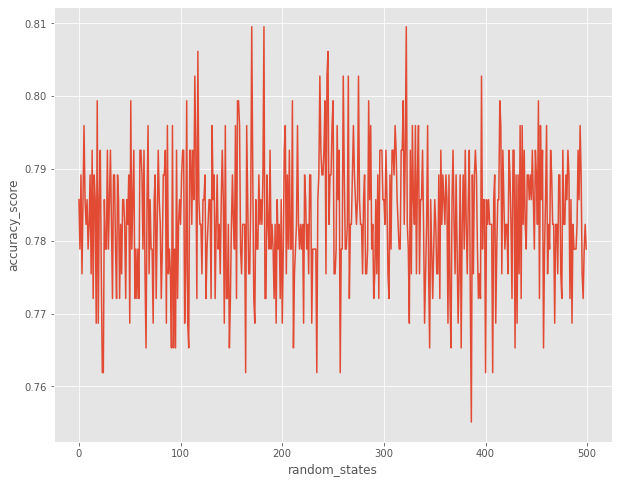

In [25]:
#plotting accuracy score with different random state
col = np.arange(0,500,1)

df = pd.DataFrame({'random_states': col, 'accuracy_score': accuracy})

plt.figure(figsize =(10,8))
sns.lineplot(x = 'random_states', y = 'accuracy_score', data =df)


In [26]:
#getting the random state with max accuracy
accuracy.index(max(accuracy)) 

170

In [27]:
#calculating confusion matrix and max accuracy with random state 329

model = DecisionTreeClassifier(random_state = 170)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc_score = metrics.accuracy_score(y_test,y_pred)

print("accuracy: ",acc_score)

#confusion matrix
from sklearn.metrics import confusion_matrix
print("\n Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

#classification report
from sklearn.metrics import classification_report
print("\n Classification Report: ")
print(classification_report(y_test, y_pred))

accuracy:  0.8095238095238095

 Confusion Matrix: 
[[211  28]
 [ 28  27]]

 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       239
         1.0       0.49      0.49      0.49        55

    accuracy                           0.81       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.81      0.81      0.81       294



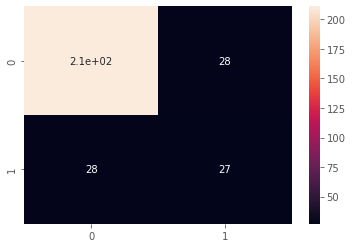

In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

### Regularization using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, {
    'max_depth' : range(2,50,5),
    'min_samples_leaf' : range(2,10,2),
    'min_samples_split' : range(10,100,5)
}, cv = 5, return_train_score = False)

clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=170),
             param_grid={'max_depth': range(2, 50, 5),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(10, 100, 5)})

In [30]:
clf.best_score_

0.8520375045077533

In [31]:
clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 65}

## SVM

In [32]:
svm = SVC(kernel ='rbf', C = 30, gamma = 'auto')
svm.fit(X_train, y_train)

SVC(C=30, gamma='auto')

In [33]:
#evaluating the model
y_pred = svm.predict(X_test)

acc_score = metrics.accuracy_score(y_test,y_pred)

print("accuracy: ",acc_score)

print("\n Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

print("\n Classification Report: ")
print(classification_report(y_test, y_pred))

accuracy:  0.8129251700680272

 Confusion Matrix: 
[[239   0]
 [ 55   0]]

 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90       239
         1.0       0.00      0.00      0.00        55

    accuracy                           0.81       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.66      0.81      0.73       294



#### Conclusion
We can see Accuracy of Decision Tree Classifier(using Grid Search) : 85%
           Accuracy of SVM classifier : 81%
           
 Both the classifiers are decently classifying the data. But Decision Tree is good. 

## K Means Clustering

In [34]:
#scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


In [36]:
#finding optimal value of cluster
k_rng = range(2,20)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
    km.fit(X)
    sse.append(km.inertia_)

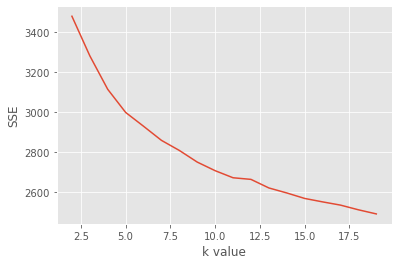

In [37]:
plt.plot(k_rng, sse)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()

We can see k = 5 at elbow

In [38]:
#model fitting
model = KMeans(n_clusters = 5)
y_pred = model.fit_predict(X)
y_pred

array([4, 1, 0, ..., 1, 2, 2])

In [39]:
#Score evaluation 
#normalized_mutual_info_score(y, y_pred)
silhouette_score(X, model.labels_, metric = 'euclidean')

0.08314971429009982

#### Conclusion
Categorical data is a problem for KMeans algorithm.
The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful.
As I have not separated categorical data and numerical data the clustering is not accurate. The accuracy score is not very good. 